In [1]:
import library as l

import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import datetime
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
file='aggressive_dedup.json'
size = 40000
topsize = 300

seed1 = np.random.randint(size)
#seed2 = np.random.randint(size)
today = datetime.date.today()

savestring = 'seed_' + str(seed1) + '_size_' + str(size) + '_topsize_' + str(topsize) + '_date_' + str(today)

if not os.path.exists(savestring):
    os.makedirs(savestring)

In [3]:
data, time, ratings, seen, indices = l.get_data(year='2001', size=size, limit=100000000)

l.save_file(savestring + '/indices.data', indices)
l.save_file(savestring + '/seen.data', seen)

l.simplify_ratings(data, ratings)
l.save_file(savestring + '/ratings.data', ratings)

#data2 = l.stopwords_filter(data)

l.selection_print(data, ratings)

x = sorted(list(data.keys()))
y = [seen.get(yr) for yr in x]
print(x, y)
plt.bar(x, y)
plt.show()
x = []
y = []

2001 >>> 40000 [0.19 0.81]
2002 >>> 40000 [0.2 0.8]
2003 >>> 40000 [0.21 0.79]
2004 >>> 40000 [0.24 0.76]
2005 >>> 40000 [0.25 0.75]
2006 >>> 40000 [0.24 0.76]
2007 >>> 40000 [0.21 0.79]
2008 >>> 40000 [0.22 0.78]
2009 >>> 40000 [0.23 0.77]
2010 >>> 40000 [0.24 0.76]
2011 >>> 40000 [0.25 0.75]
2012 >>> 40000 [0.23 0.77]
2013 >>> 40000 [0.21 0.79]
2014 >>> 40000 [0.21 0.79]


In [4]:
LR = LogisticRegression(penalty='l1', n_jobs=-1, solver='saga', max_iter=300)
#LR = LogisticRegression(penalty='l1', n_jobs=-1, solver='saga', max_iter=100, class_weight='balanced')

CV = CountVectorizer(ngram_range=(1,2), analyzer='word', min_df=5) #, max_features=20000)

features = []
x = sorted(list(data.keys()))

In [5]:
for i, key in enumerate(x):
    LR, CV = l.predict_scores(data[key], ratings[key], CV, LR, i, key, savestring, features)
    
    if i == 0:
        top_f = [[x,[len(features)-i]] for i, (_,x) in enumerate(sorted(zip(LR.coef_[0],features)))][:(-topsize - 1):-1]
        bot_f = [[x,[i+1]] for i, (_,x) in enumerate(sorted(zip(LR.coef_[0],features)))][:topsize]
    else:
        for i, m in enumerate(top_f):
            top_f[i][1] += [len(features)-i for i, (_,x) in enumerate(sorted(zip(LR.coef_[0],features))) if x == m[0]]
        for i, m in enumerate(bot_f):
            bot_f[i][1] += ([i+1 for i, (_,x) in enumerate(sorted(zip(LR.coef_[0],features))) if x == m[0]])

l.save_file(savestring + '/top_f.data', top_f)
l.save_file(savestring + '/bot_f.data', bot_f)

D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.87625
2001
f1: [0.62386018 0.92594255]
recall: [0.53942181 0.95538747]
precision: [0.73963964 0.89825835]

0.870125
2002
f1: [0.62341428 0.92153161]
recall: [0.54020101 0.95209114]
precision: [0.73693231 0.89287282]

0.8705
2003
f1: [0.66254072 0.91987626]
recall: [0.59648094 0.94471803]
precision: [0.74505495 0.89630746]

0.847
2004
f1: [0.62477008 0.90390956]
recall: [0.54259851 0.94037896]
precision: [0.73627168 0.87016324]

0.854625
2005
f1: [0.66513101 0.90716053]
recall: [0.58928571 0.94072848]
precision: [0.76338401 0.87590566]

0.84325
2006
f1: [0.61976956 0.90127539]
recall: [0.54160042 0.93636512]
precision: [0.724309   0.86872059]

0.862875
2007
f1: [0.62080885 0.91630426]
recall: [0.5495716  0.94329249]
precision: [0.7132645  0.89081739]

0.858125
2008
f1: [0.65802953 0.91049602]
recall: [0.58395722 0.94176183]
precision: [0.75362319 0.88123951]

0.8545
2009
f1: [0.62084691 0.9099768 ]
recall: [0.54271071 0.9421845 ]
precision: [0.72526636 0.87989829]

0.865375
2010
f1: [

In [6]:
for i in range(len(x)):
    print(sum([1/x[1][i] for x in top_f])/len(top_f))

0.021001105508248057
0.018108523001792998
0.017130272554946323
0.01795584625945576
0.0177391846401782
0.01771582763568529
0.017259498420843362
0.01684025214861569
0.016495925944728932
0.016493909342966823
0.01609612198436875
0.01596363086770671
0.016025712751683893
0.015861526211457748


In [7]:
for i in range(len(x)):
    print(sum([1/x[1][i] for x in bot_f])/len(bot_f))

0.020942212934331673
0.018467022845235836
0.017889820063924915
0.0182884599490126
0.018480411312427055
0.018482272683969535
0.017951591274446514
0.017613126692673505
0.017052376592269648
0.016754085711801297
0.015530767862258056
0.01647173194128138
0.016156037697433692
0.015534540358422753


In [39]:
len(bot_f)

300

In [36]:
for i, m in enumerate(top_f):
    for j, n in enumerate(top_f[i][1]):
        if n > 1000:
            top_f[i][1][j] = 1000

slope:  0.8483516483516484


D:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


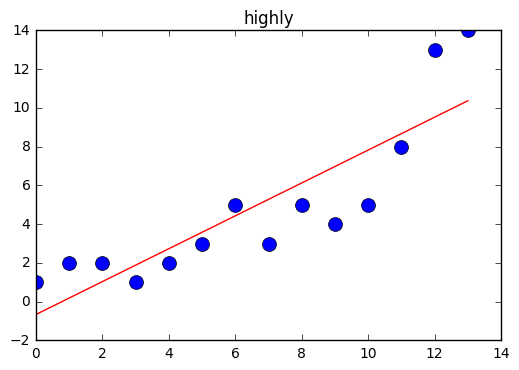

slope:  5.5164835164835155


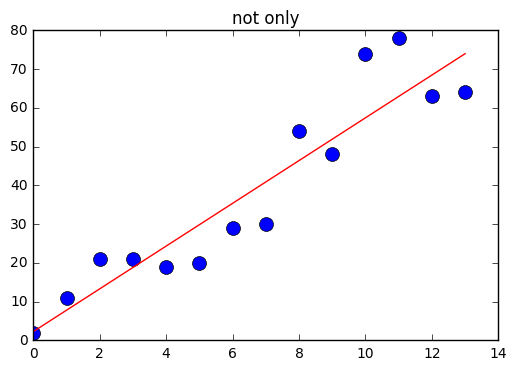

slope:  -0.47912087912087886


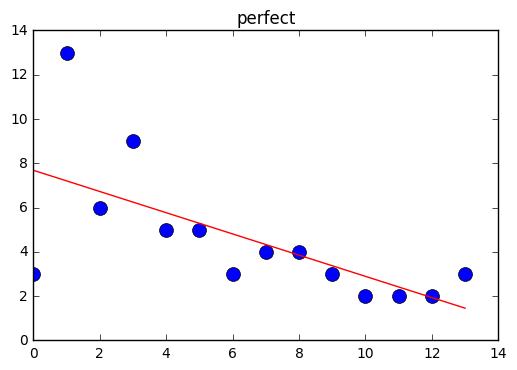

slope:  0.04835164835164827


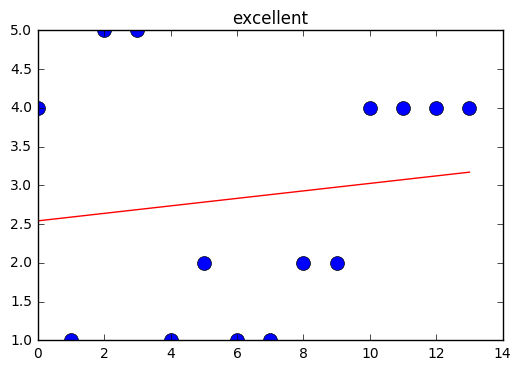

slope:  0.6439560439560437


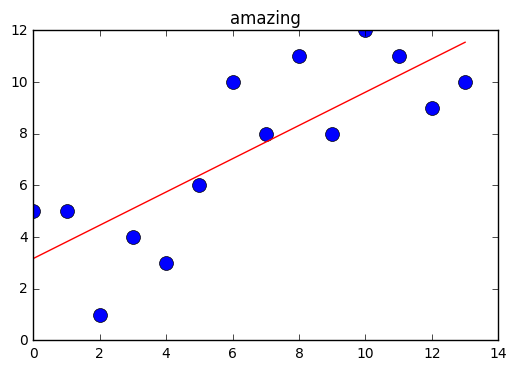

slope:  0.8703296703296702


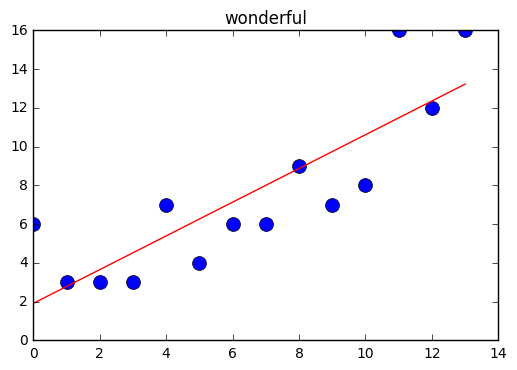

slope:  -0.7956043956043956


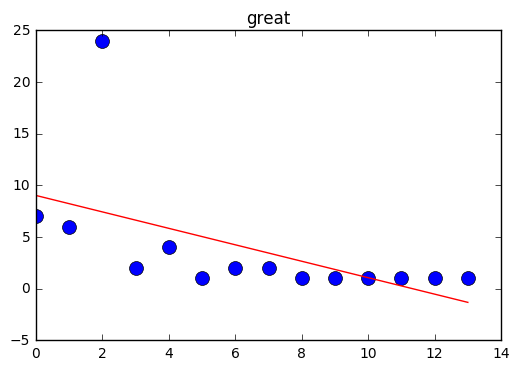

slope:  1.1978021978021978


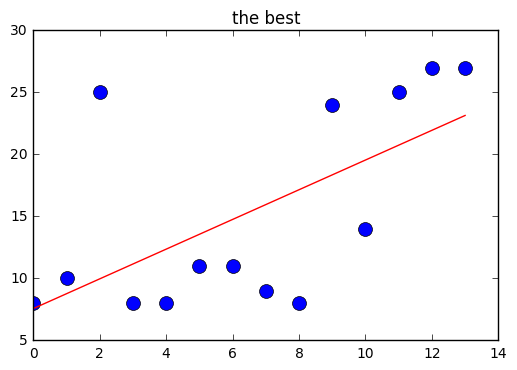

slope:  16.628571428571423


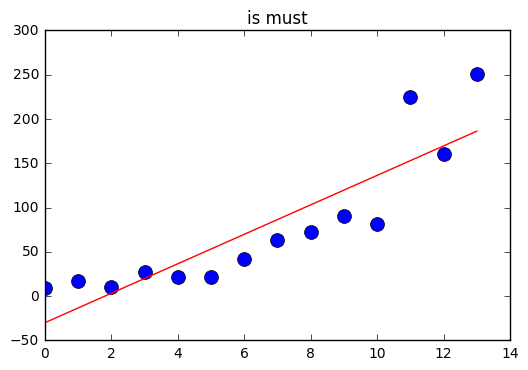

slope:  7.7802197802197774


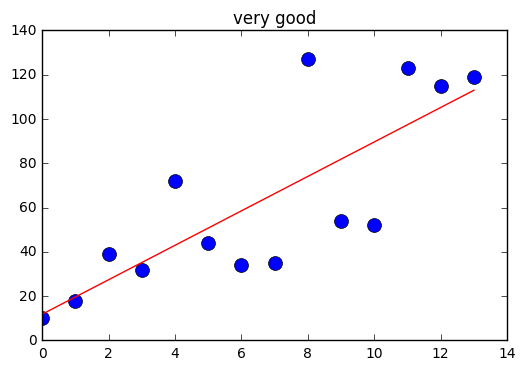

slope:  0.45494505494505505


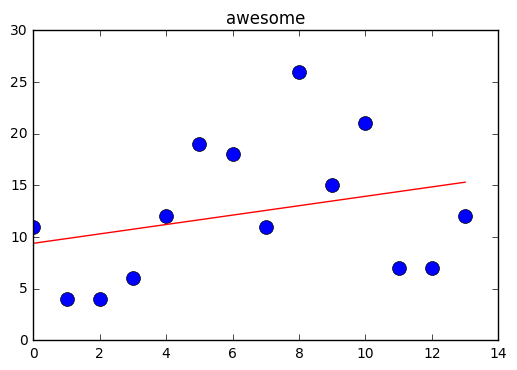

slope:  2.786813186813187


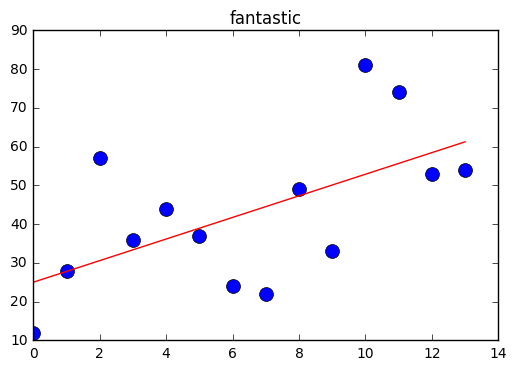

slope:  -0.6439560439560439


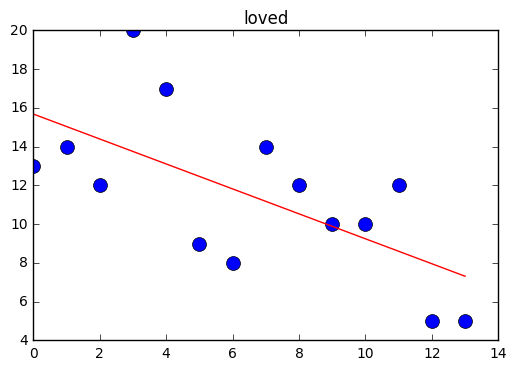

slope:  1.2725274725274727


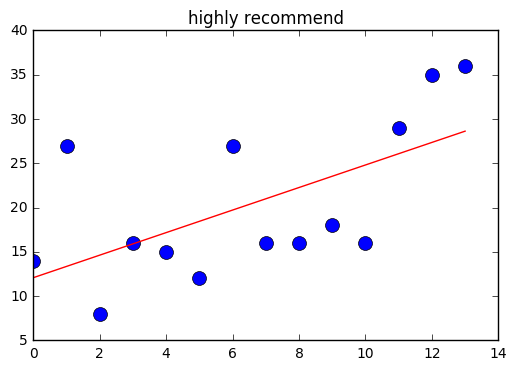

slope:  -1.2439560439560438


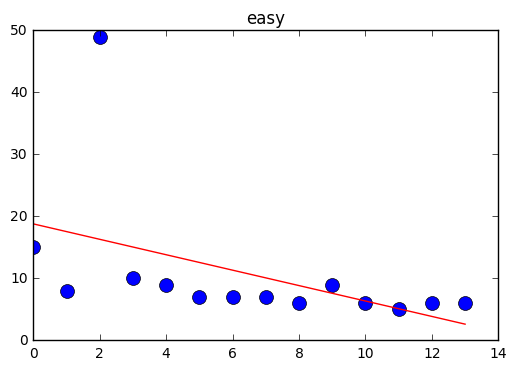

In [29]:
for i in range(15):
    temp = top_f[i][1]
    x = range(len(temp))
    y = temp
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y)[0]
    print('slope: ', m)
    plt.plot(x, y, 'o', label='Original data', markersize=10)
    plt.plot(x, m*x + c, 'r', label='Fitted line')
    plt.title(top_f[i][0])
    plt.show()

['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'] [641057, 665193, 721220, 862542, 1192688, 1298316, 1959168, 2251645, 2884651, 3796743, 6044654, 11471413, 28000200, 19699868]


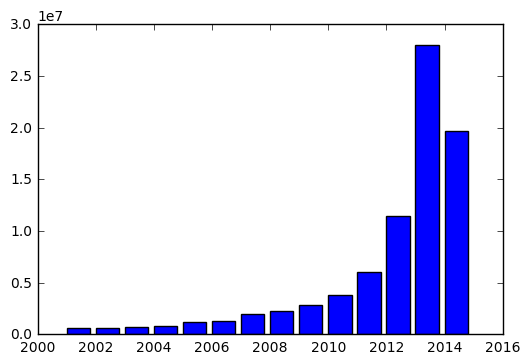